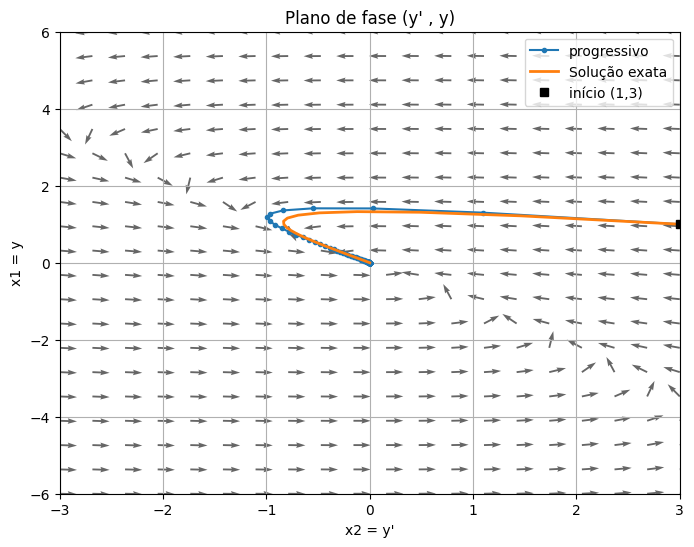

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parametros :

Passo = 0.1
Tempo = 10
Numero = int(Tempo/Passo)
Conjunto_Solucao = np.zeros((Numero+1, 2))  # vetor (Linhas,colunas) -> y ,y'
Conjunto_Solucao[0, :] = [1.0, 3.0]  # C.I

# def   sistema:
    #Def sistema
def f(x):
    x1, x2 = x # y'
    return np.array([x2, -4*x1-5*x2]) # y''

    #Interações
for n in range(Numero):
    Conjunto_Solucao[n+1] = Conjunto_Solucao[n] + Passo*f(Conjunto_Solucao[n])

    # pontos de tempo para a solução exata (Mexer)
t = np.linspace(0, Tempo, Numero+1)
y_exact = ((7/3) * np.exp(-1.0*t)) - ((4/3) * np.exp(-4.0*t))
yp_exact = ((-7/3) * np.exp(-1.0*t)) + ((16/3) * np.exp(-4.0*t))

# campo
    #Grade
x1_valores = np.linspace(-6,6,20) #-> vertical
x2_valores = np.linspace(-3,3,20) #->horizontal
Conjunto_Solucao1, Conjunto_Solucao2 = np.meshgrid(x1_valores,x2_valores)

    #Campo vetores
dConjunto_Solucao1 = Conjunto_Solucao2
dConjunto_Solucao2 = -4*Conjunto_Solucao1-5*Conjunto_Solucao2

    #Normalizar
Nrm = np.sqrt(dConjunto_Solucao1**2 + dConjunto_Solucao2**2)
Nrm[Nrm==0] = 1.0
dConjunto_Solucao1n = dConjunto_Solucao1/Nrm
dConjunto_Solucao2n = dConjunto_Solucao2/Nrm

# plot
plt.figure(figsize=(8,6))
plt.quiver(Conjunto_Solucao2,Conjunto_Solucao1,dConjunto_Solucao2n,dConjunto_Solucao1n, angles='xy' , alpha = 0.6)
plt.plot(Conjunto_Solucao[:,1], Conjunto_Solucao[:,0] ,'-o', markersize=3 , label = 'progressivo')
plt.plot(yp_exact, y_exact, '-', lw=2, label='Solução exata')
plt.plot(Conjunto_Solucao[0,1], Conjunto_Solucao[0,0], 'ks', label='início (1,3)')
plt.xlabel("x2 = y'")
plt.ylabel("x1 = y")
plt.title("Plano de fase solução distintas (y' , y)")
plt.legend()
plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.show()

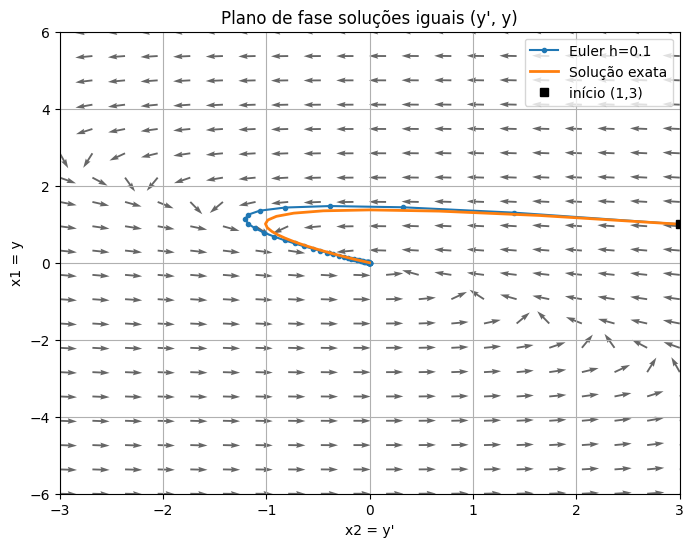

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros
h = 0.1
T = 5.0
N = int(T / h)
x = np.zeros((N+1, 2))

# condição inicial (x1 = y, x2 = y')
x[0, :] = [1.0, 3.0]

# função do sistema y'' + 4 y' + 4 y = 0
def f(x):
    x1, x2 = x
    return np.array([x2, -4.0*x1 - 4.0*x2])

# Euler explícito
for n in range(N):
    x[n+1] = x[n] + h * f(x[n])

# pontos de tempo para a solução exata
t = np.linspace(0, T, N+1)
y_exact = (1.0 + 5.0*t) * np.exp(-2.0*t)
yp_exact = (3.0 - 10.0*t) * np.exp(-2.0*t)

# grade para o campo de vetores
x1_vals = np.linspace(-6, 6, 20)   # y
x2_vals = np.linspace(-3, 3, 20)   # y'
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Campo de vetores (dX1 = x2, dX2 = -4 x1 -4 x2)
dX1 = X2
dX2 = -4*X1 - 4*X2

# normalizar para visualização
Nrm = np.sqrt(dX2**2 + dX1**2)
Nrm[Nrm == 0] = 1.0
dX2n = dX2 / Nrm
dX1n = dX1 / Nrm

plt.figure(figsize=(8, 6))
plt.quiver(X2, X1, dX2n, dX1n, angles='xy', alpha=0.6)

# trajetória aproximada por Euler (x[:,0]=y, x[:,1]=y')
plt.plot(x[:, 1], x[:, 0], '-o', markersize=3, label=f'Euler h={h}')

# trajetória exata (y' , y )
plt.plot(yp_exact, y_exact, '-', lw=2, label='Solução exata')

plt.plot(x[0, 1], x[0, 0], 'ks', label='início (1,3)')
plt.xlabel("x2 = y'")
plt.ylabel("x1 = y")
plt.title("Plano de fase soluções iguais (y', y)")
plt.legend()
plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.show()

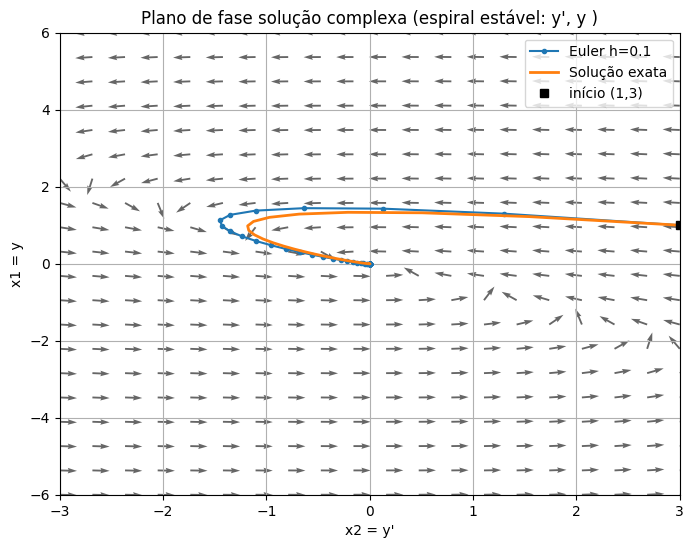

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros
h = 0.1
T = 5.0
N = int(T / h)
x = np.zeros((N+1, 2))

# condição inicial (x1 = y, x2 = y')
x[0, :] = [1.0, 3.0]

# função do sistema para y'' + 4 y' + 5 y = 0
def f(x):
    x1, x2 = x
    return np.array([x2, -5.0*x1 - 4.0*x2])

# Euler explícito
for n in range(N):
    x[n+1] = x[n] + h * f(x[n])

# Euler regressivo
'''for n in range(N):
    x[n+1] = np.linalg.solve(np.eye(2) - h*np.array([[0, 1], [-5, -4]]), x[n])'''

# solução exata
t = np.linspace(0, T, N+1)
r, w = -2, 1  # parte real e imaginária dos autovalores
# Cálculo de C1 e C2
y_exact = np.exp(r*t)*(1*np.cos(w*t) + ((3 - r*1)/w)*np.sin(w*t))
yp_exact = np.exp(-2*t) * ( 3*np.cos(t) - 11*np.sin(t) )


# grade para o campo de vetores
x1_vals = np.linspace(-6, 6, 20)   # y
x2_vals = np.linspace(-3, 3, 20)   # y'
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Campo de vetores
dX1 = X2
dX2 = -5*X1 - 4*X2

# normalizar para visualização
Nrm = np.sqrt(dX2**2 + dX1**2)
Nrm[Nrm == 0] = 1.0
dX2n = dX2 / Nrm
dX1n = dX1 / Nrm

plt.figure(figsize=(8,6))
plt.quiver(X2, X1, dX2n, dX1n, angles='xy', alpha=0.6)

# trajetória Euler
plt.plot(x[:,1], x[:,0], '-o', markersize=3, label=f'Euler h={h}')

# trajetória exata
plt.plot(yp_exact, y_exact, '-', lw=2, label='Solução exata')
plt.plot(x[0,1], x[0,0], 'ks', label='início (1,3)')
plt.xlabel("x2 = y'")
plt.ylabel("x1 = y")
plt.title("Plano de fase solução complexa (espiral estável: y', y )")
plt.legend()
plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.show()